# Project_Default Prediction
Authors : Richa Gupta
Created : oct, 2022
Business Problem type: Predicting Loan Default

In [1]:
# For Data manipulation and ML algo
import numpy as np
import pandas as pd
#visualization lib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")




In [2]:
#uploading of dataset
Loan_dataset_1=pd.read_csv("C:\\Users\\owner\\Desktop\\Machine Learning project\\train_data_1.csv")

In [3]:
#uploading of train2 dataset
Loan_dataset_2=pd.read_csv("C:\\Users\\owner\\Desktop\\Machine Learning project\\train_data_2.csv")

In [4]:
#combined both data set
dataset=pd.concat([Loan_dataset_1,Loan_dataset_2],axis=0)

In [5]:
#finding the size of data set
print(f'shape of Loan_dataset_1 {Loan_dataset_1.shape}')
print(f'shape of Loan_dataset_2 {Loan_dataset_2.shape}')
print(f'shape of dataset {dataset.shape}')



shape of Loan_dataset_1 (270000, 45)
shape of Loan_dataset_2 (262428, 45)
shape of dataset (532428, 45)


In [6]:
#Stucture of dataset
dataset.head().T

,0,1,2,3,4
member_id,58189336,70011223,70255675,1893936,7652106
loan_amnt,14350,4800,10000,15000,16000
funded_amnt,14350,4800,10000,15000,16000
funded_amnt_inv,14350.0,4800.0,10000.0,15000.0,16000.0
term,36 months,36 months,36 months,36 months,36 months
batch_enrolled,NaN,BAT1586599,BAT1586599,BAT4808022,BAT2833642
int_rate,19.19,10.99,7.26,19.72,10.64
grade,E,B,A,D,B
sub_grade,E3,B4,A4,D5,B2
emp_title,clerk,Human Resources Specialist,Driver,Us office of Personnel Management,LAUSD-HOLLYWOOD HIGH SCHOOL


In [7]:
#Target feature
Y_dataset=pd.DataFrame(dataset[["loan_status"]])

In [8]:
#checling out the unique values in the loan_status feature 
Y_dataset.value_counts()

loan_status
0              406601
1              125827
dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

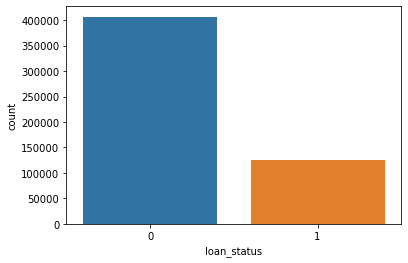

In [9]:
#visualisation of unique value in feature
sns.countplot(x="loan_status",data=Y_dataset)

0's are near about 75% of total count,1's are 25% clear case of data imbalance where data have enough 0 to learn the trend but not enough records to learn the trend of 1's.

In [10]:
Y_dataset.head(10)

,loan_status
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [11]:
#independent features
X_dataset=dataset.loc[:,dataset.columns!="loan_status"]

In [12]:
X_dataset

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,58189336,14350,14350,14350.0,36 months,NaN,19.19,E,E3,clerk,...,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262423,31296187,20000,20000,20000.0,36 months,NaN,12.49,B,B5,Registered Nurse,...,0.0,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0
262424,29403184,12000,12000,12000.0,60 months,BAT2003848,14.99,C,C5,Account Mgr,...,0.0,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0
262425,7357607,18725,18725,18725.0,60 months,NaN,20.80,E,E1,Comcast cable,...,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0
262426,23182668,21000,21000,21000.0,60 months,BAT3193689,16.29,D,D2,Resident Physician,...,0.0,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0


In [13]:
#finding out the datatype of independent feature
X_dataset.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
batch_enrolled                  object
int_rate                       float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                 

In [14]:
#working on object dtype first
X_dataset_cat=X_dataset.select_dtypes(include="object")

In [15]:
X_dataset_cat

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint,last_week_pay
0,36 months,NaN,E,E3,clerk,9 years,OWN,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,f,INDIVIDUAL,NaN,26th week
1,36 months,BAT1586599,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,w,INDIVIDUAL,NaN,9th week
2,36 months,BAT1586599,A,A4,Driver,2 years,OWN,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,w,INDIVIDUAL,NaN,9th week
3,36 months,BAT4808022,D,D5,Us office of Personnel Management,10+ years,RENT,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,f,INDIVIDUAL,NaN,135th week
4,36 months,BAT2833642,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,Verified,n,NaN,credit_card,refi,900xx,CA,w,INDIVIDUAL,NaN,96th week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262423,36 months,NaN,B,B5,Registered Nurse,10+ years,MORTGAGE,Source Verified,n,NaN,debt_consolidation,Debt consolidation,481xx,MI,f,INDIVIDUAL,NaN,65th week
262424,60 months,BAT2003848,C,C5,Account Mgr,10+ years,MORTGAGE,Not Verified,n,NaN,debt_consolidation,Debt consolidation,496xx,MI,w,INDIVIDUAL,NaN,70th week
262425,60 months,NaN,E,E1,Comcast cable,8 years,RENT,Verified,n,NaN,debt_consolidation,Debt consolidation,370xx,TN,f,INDIVIDUAL,NaN,9th week
262426,60 months,BAT3193689,D,D2,Resident Physician,1 year,RENT,Source Verified,n,NaN,credit_card,Credit card refinancing,432xx,OH,w,INDIVIDUAL,NaN,78th week


In [16]:
#percentage of missing value in X_dataset_cat
a=X_dataset_cat.isna().sum()
perc=a/len(X_dataset_cat)*100
print(a)
perc



term                              0
batch_enrolled               191228
grade                             0
sub_grade                         0
emp_title                     30833
emp_length                    26891
home_ownership                    0
verification_status               0
pymnt_plan                        0
desc                         456829
purpose                           0
title                            90
zip_code                          0
addr_state                        0
initial_list_status               0
application_type                  0
verification_status_joint    532123
last_week_pay                     0
dtype: int64


term                          0.000000
batch_enrolled               35.916218
grade                         0.000000
sub_grade                     0.000000
emp_title                     5.791018
emp_length                    5.050636
home_ownership                0.000000
verification_status           0.000000
pymnt_plan                    0.000000
desc                         85.801085
purpose                       0.000000
title                         0.016904
zip_code                      0.000000
addr_state                    0.000000
initial_list_status           0.000000
application_type              0.000000
verification_status_joint    99.942715
last_week_pay                 0.000000
dtype: float64

In [17]:
X_dataset_cat.nunique()

term                              2
batch_enrolled                  103
grade                             7
sub_grade                        35
emp_title                    190124
emp_length                       11
home_ownership                    6
verification_status               3
pymnt_plan                        2
desc                          70638
purpose                          14
title                         39693
zip_code                        917
addr_state                       51
initial_list_status               2
application_type                  2
verification_status_joint         3
last_week_pay                    98
dtype: int64

In [18]:
#Considering 85% and 99% data are missing, we can drop these columns for now
X_dataset_cat.drop(["verification_status_joint","desc"],axis=1,inplace=True)

In [19]:
X_dataset_cat.shape

(532428, 16)

In [20]:
X_dataset_cat["batch_enrolled"].value_counts()

BAT2252229    18791
BAT3873588    17839
BAT2803411    17111
BAT2078974    14859
BAT1586599    14463
              ...  
BAT4347689       30
BAT4884699       29
BAT5869156       26
BAT5077496       18
BAT2331079       13
Name: batch_enrolled, Length: 103, dtype: int64

For batch_enrolled as well there is no clear distinction of what should be treated as mode, so let's drop that for now¶

In [21]:
X_dataset_cat.drop(["batch_enrolled"],axis=1,inplace=True)

In [22]:
X_dataset_cat.shape

(532428, 15)

In [23]:
X_dataset_cat["title"].value_counts()

Debt consolidation                    248967
Credit card refinancing                98582
Home improvement                       24057
Other                                  19053
Debt Consolidation                      9932
                                       ...  
debt consult / home improvment             1
Take Control of Debt B4 Med School         1
Realign  My Financial Integrity            1
Changing my life                           1
Loan for Deck                              1
Name: title, Length: 39693, dtype: int64

In [24]:
#X_dataset_cat["title"]=X_dataset_cat["title"].fillna(X_dataset_cat["title"].mode(),inplace=True)

In [25]:
#X_dataset_cat["emp_title"]=X_dataset_cat["emp_title"].fillna(X_dataset_cat["emp_title"].mode(),inplace=True)
#X_dataset_cat["emp_length"]=X_dataset_cat["emp_length"].fillna(X_dataset_cat["emp_length"].mode(),inplace=True)

In [26]:
#X_dataset_cat.isna().sum()

# We can create a seperate model in order to get the missing value treated but that will consume time, so for now applying the most easy way to deal with categorical data

In [27]:
key=[]
value=[]
for i in ["title","emp_title","emp_length"]:
    print(f'most appearing value for {i} is {X_dataset_cat[i].mode()}')

most appearing value for title is 0    Debt consolidation
Name: title, dtype: object
most appearing value for emp_title is 0    Teacher
Name: emp_title, dtype: object
most appearing value for emp_length is 0    10+ years
Name: emp_length, dtype: object


In [28]:
# create a dictionary
key=["title","emp_title","emp_length"]
value=["Debt consolidation","Teacher","10+ years"]
for i in [0,1,2]:
    X_dataset_cat[key[i]].fillna(value[i],inplace=True)

In [29]:
#percentage of missing value in X_dataset_cat
a=X_dataset_cat.isna().sum()
perc=a/len(X_dataset_cat)*100
print(a)
perc

term                   0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
verification_status    0
pymnt_plan             0
purpose                0
title                  0
zip_code               0
addr_state             0
initial_list_status    0
application_type       0
last_week_pay          0
dtype: int64


term                   0.0
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
verification_status    0.0
pymnt_plan             0.0
purpose                0.0
title                  0.0
zip_code               0.0
addr_state             0.0
initial_list_status    0.0
application_type       0.0
last_week_pay          0.0
dtype: float64

# No missing records in categorical variable
#Similarly we can treat the missing for numberical (Int and Float) type columns
#
15 feature for categorical data

In [30]:
X_dataset_num=X_dataset.select_dtypes(exclude="object")

In [31]:
X_dataset_num

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,58189336,14350,14350,14350.0,19.19,28700.0,33.88,0.0,1.0,50.0,...,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0,30800.0
1,70011223,4800,4800,4800.0,10.99,65000.0,3.64,0.0,1.0,NaN,...,83.95,0.0,0.0,0.0,0.0,NaN,0.0,0.0,9974.0,32900.0
2,70255675,10000,10000,10000.0,7.26,45000.0,18.42,0.0,0.0,NaN,...,56.47,0.0,0.0,0.0,0.0,NaN,0.0,65.0,38295.0,34900.0
3,1893936,15000,15000,15000.0,19.72,105000.0,14.97,0.0,2.0,46.0,...,4858.62,0.0,0.0,0.0,0.0,NaN,0.0,0.0,55564.0,24700.0
4,7652106,16000,16000,16000.0,10.64,52000.0,20.16,0.0,0.0,NaN,...,2296.41,0.0,0.0,0.0,0.0,NaN,0.0,0.0,47159.0,47033.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262423,31296187,20000,20000,20000.0,12.49,75000.0,14.53,0.0,0.0,NaN,...,2595.45,0.0,0.0,0.0,0.0,NaN,0.0,0.0,83087.0,24800.0
262424,29403184,12000,12000,12000.0,14.99,59000.0,22.97,0.0,0.0,NaN,...,2182.92,0.0,0.0,0.0,0.0,NaN,0.0,0.0,227812.0,17800.0
262425,7357607,18725,18725,18725.0,20.80,42504.0,27.27,0.0,1.0,26.0,...,645.32,0.0,0.0,0.0,0.0,NaN,0.0,0.0,26010.0,24200.0
262426,23182668,21000,21000,21000.0,16.29,50000.0,14.91,0.0,1.0,NaN,...,4619.79,0.0,0.0,0.0,0.0,NaN,0.0,0.0,29197.0,23300.0


In [32]:
b=X_dataset_num.isna().sum()
perc=b/len(X_dataset_num)*100
print(b)
perc

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
annual_inc                          3
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec                            16
revol_bal                           0
revol_util                        287
total_acc                          16
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         95
mths_since_last_major_derog    399448
acc_now_delinq                     16
tot_coll_amt                    42004
tot_cur_bal                     42004
total_rev_hi_lim                42004
dtype: int64

member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
int_rate                        0.000000
annual_inc                      0.000563
dti                             0.000000
delinq_2yrs                     0.003005
inq_last_6mths                  0.003005
mths_since_last_delinq         51.190771
mths_since_last_record         84.575755
open_acc                        0.003005
pub_rec                         0.003005
revol_bal                       0.000000
revol_util                      0.053904
total_acc                       0.003005
total_rec_int                   0.000000
total_rec_late_fee              0.000000
recoveries                      0.000000
collection_recovery_fee         0.000000
collections_12_mths_ex_med      0.017843
mths_since_last_major_derog    75.023853
acc_now_delinq                  0.003005
tot_coll_amt                    7.889142
tot_cur_bal     

In [33]:
X_dataset_num.drop(["mths_since_last_major_derog","mths_since_last_record","mths_since_last_delinq"],axis=1,inplace=True)

In [34]:
X_dataset_num.shape

(532428, 23)

In [35]:
key1=["annual_inc",
     "delinq_2yrs",
     "inq_last_6mths",
     "open_acc",
     "pub_rec",
     "revol_util",
     "total_acc",
    "collections_12_mths_ex_med",
     "acc_now_delinq",
     "tot_coll_amt",
     "tot_cur_bal",
     "total_rev_hi_lim"]
for i in range (len(key1)):
    X_dataset_num[key1[i]].fillna(X_dataset_num[key1[i]].median(),inplace=True)


In [36]:
b=X_dataset_num.isna().sum()
perc=b/len(X_dataset_num)*100
print(b)
perc

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64


member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
int_rate                      0.0
annual_inc                    0.0
dti                           0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
collection_recovery_fee       0.0
collections_12_mths_ex_med    0.0
acc_now_delinq                0.0
tot_coll_amt                  0.0
tot_cur_bal                   0.0
total_rev_hi_lim              0.0
dtype: float64

# No missing value can be seen now
For categorical variable Either go for one hot encoding or check for some variable reduction technique to find the imp ones out of the set of these categorical variable variable
Using too many variables will create dimentional complexity, so we cannot just rely on one hot encoding for all variable¶

In [37]:
X_dataset_cat.head().T

,0,1,2,3,4
term,36 months,36 months,36 months,36 months,36 months
grade,E,B,A,D,B
sub_grade,E3,B4,A4,D5,B2
emp_title,clerk,Human Resources Specialist,Driver,Us office of Personnel Management,LAUSD-HOLLYWOOD HIGH SCHOOL
emp_length,9 years,< 1 year,2 years,10+ years,10+ years
home_ownership,OWN,MORTGAGE,OWN,RENT,RENT
verification_status,Source Verified,Source Verified,Not Verified,Not Verified,Verified
pymnt_plan,n,n,n,n,n
purpose,debt_consolidation,home_improvement,debt_consolidation,debt_consolidation,credit_card
title,Debt consolidation,Home improvement,Debt consolidation,Debt consolidation,refi


In [38]:
#convertion of all str in lower case in all categorical data
for i in X_dataset_cat.columns:
    X_dataset_cat[i]=X_dataset_cat[i].str.lower()

In [39]:
X_dataset_cat.head().T

,0,1,2,3,4
term,36 months,36 months,36 months,36 months,36 months
grade,e,b,a,d,b
sub_grade,e3,b4,a4,d5,b2
emp_title,clerk,human resources specialist,driver,us office of personnel management,lausd-hollywood high school
emp_length,9 years,< 1 year,2 years,10+ years,10+ years
home_ownership,own,mortgage,own,rent,rent
verification_status,source verified,source verified,not verified,not verified,verified
pymnt_plan,n,n,n,n,n
purpose,debt_consolidation,home_improvement,debt_consolidation,debt_consolidation,credit_card
title,debt consolidation,home improvement,debt consolidation,debt consolidation,refi


In [40]:
X_dataset_cat.nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              166684
emp_length                 11
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   33644
zip_code                  917
addr_state                 51
initial_list_status         2
application_type            2
last_week_pay              98
dtype: int64

In [41]:
#we will take only numeric part of below feature rest str afe same for all the records for sub_grade
#str part also diff so leave that feature

cols=["term","emp_length","zip_code","last_week_pay"]
for i in cols:
    X_dataset_cat[i]=X_dataset_cat[i].str.extract('(\d*\.?\d+)',expand=True)


In [42]:
X_dataset_cat.head().T

,0,1,2,3,4
term,36,36,36,36,36
grade,e,b,a,d,b
sub_grade,e3,b4,a4,d5,b2
emp_title,clerk,human resources specialist,driver,us office of personnel management,lausd-hollywood high school
emp_length,9,1,2,10,10
home_ownership,own,mortgage,own,rent,rent
verification_status,source verified,source verified,not verified,not verified,verified
pymnt_plan,n,n,n,n,n
purpose,debt_consolidation,home_improvement,debt_consolidation,debt_consolidation,credit_card
title,debt consolidation,home improvement,debt consolidation,debt consolidation,refi


In [43]:
#check missing value once again
a=X_dataset_cat.isna().sum()
perc=a/len(X_dataset_cat)*100
print(a)
perc

term                       0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
verification_status        0
pymnt_plan                 0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
initial_list_status        0
application_type           0
last_week_pay          10614
dtype: int64


term                   0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              0.000000
emp_length             0.000000
home_ownership         0.000000
verification_status    0.000000
pymnt_plan             0.000000
purpose                0.000000
title                  0.000000
zip_code               0.000000
addr_state             0.000000
initial_list_status    0.000000
application_type       0.000000
last_week_pay          1.993509
dtype: float64

In [44]:
X_dataset_cat["last_week_pay"].mode()

0    13
Name: last_week_pay, dtype: object

In [45]:
X_dataset_cat["last_week_pay"].fillna(13,inplace=True)

In [46]:
a=X_dataset_cat.isna().sum()
perc=a/len(X_dataset_cat)*100
print(a)
perc

term                   0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
verification_status    0
pymnt_plan             0
purpose                0
title                  0
zip_code               0
addr_state             0
initial_list_status    0
application_type       0
last_week_pay          0
dtype: int64


term                   0.0
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
verification_status    0.0
pymnt_plan             0.0
purpose                0.0
title                  0.0
zip_code               0.0
addr_state             0.0
initial_list_status    0.0
application_type       0.0
last_week_pay          0.0
dtype: float64

In [47]:
# Convert extracted columns to numeric format 
for i in cols:
    X_dataset_cat[i] = pd.to_numeric(X_dataset_cat[i])

In [48]:
X_dataset_cat.dtypes

term                    int64
grade                  object
sub_grade              object
emp_title              object
emp_length              int64
home_ownership         object
verification_status    object
pymnt_plan             object
purpose                object
title                  object
zip_code                int64
addr_state             object
initial_list_status    object
application_type       object
last_week_pay           int64
dtype: object

term,last_week_pay,emp_length,zip_code data type convert object to int

In [49]:
#Label Encoding for object to numeric conversion
# We can use other techniques but that may decrease the efficiency 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
listA=["grade","sub_grade"]
for i in listA:
    X_dataset_cat[i]=le.fit_transform(X_dataset_cat[i])

In [51]:
X_dataset_cat.head().T

,0,1,2,3,4
term,36,36,36,36,36
grade,4,1,0,3,1
sub_grade,22,8,3,19,6
emp_title,clerk,human resources specialist,driver,us office of personnel management,lausd-hollywood high school
emp_length,9,1,2,10,10
home_ownership,own,mortgage,own,rent,rent
verification_status,source verified,source verified,not verified,not verified,verified
pymnt_plan,n,n,n,n,n
purpose,debt_consolidation,home_improvement,debt_consolidation,debt_consolidation,credit_card
title,debt consolidation,home improvement,debt consolidation,debt consolidation,refi


In [52]:
X_dataset_cat.dtypes

term                    int64
grade                   int32
sub_grade               int32
emp_title              object
emp_length              int64
home_ownership         object
verification_status    object
pymnt_plan             object
purpose                object
title                  object
zip_code                int64
addr_state             object
initial_list_status    object
application_type       object
last_week_pay           int64
dtype: object

##One Hot Encoding
home_ownership,verification_shome_ownershiptatus,pymnt_plan,purpose,,addr_state,initial_list_status,application_type--- One Hot encoding as order does not hold importance.

In [53]:
 Final_cat_data=pd.get_dummies(X_dataset_cat,columns=['home_ownership', 'verification_status', 
'pymnt_plan','purpose','addr_state', 'initial_list_status','application_type'],drop_first=True)

In [54]:
Final_cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532428 entries, 0 to 262427
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   term                                 532428 non-null  int64 
 1   grade                                532428 non-null  int32 
 2   sub_grade                            532428 non-null  int32 
 3   emp_title                            532428 non-null  object
 4   emp_length                           532428 non-null  int64 
 5   title                                532428 non-null  object
 6   zip_code                             532428 non-null  int64 
 7   last_week_pay                        532428 non-null  int64 
 8   home_ownership_mortgage              532428 non-null  uint8 
 9   home_ownership_none                  532428 non-null  uint8 
 10  home_ownership_other                 532428 non-null  uint8 
 11  home_ownership_own        

In [55]:
Final_cat_data.describe()

,term,grade,sub_grade,emp_length,zip_code,last_week_pay,home_ownership_mortgage,home_ownership_none,home_ownership_other,home_ownership_own,...,addr_state_tx,addr_state_ut,addr_state_va,addr_state_vt,addr_state_wa,addr_state_wi,addr_state_wv,addr_state_wy,initial_list_status_w,application_type_joint
count,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,...,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000
mean,43.195790,1.797141,10.954745,6.291410,511.414958,57.200489,0.499485,0.000068,0.000220,0.098913,...,0.079874,0.007192,0.029724,0.001995,0.021907,0.012922,0.004911,0.002250,0.485343,0.000573
std,10.996354,1.312184,6.489916,3.550671,313.237389,44.324033,0.500000,0.008223,0.014822,0.298545,...,0.271098,0.084498,0.169826,0.044617,0.146381,0.112938,0.069910,0.047382,0.499786,0.023927
min,36.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,1.000000,6.000000,3.000000,226.000000,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,2.000000,10.000000,7.000000,475.000000,48.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,3.000000,15.000000,10.000000,802.000000,83.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,60.000000,6.000000,34.000000,10.000000,999.000000,304.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Since we have huge variance in categorical variable emp_title and title columns , we can just create some indicators with titles with maximum occurance ( Overall and with event as 1)

In [56]:
Final_cat_data["emp_title"].value_counts()
Final_cat_data["emp_title"].where(Y_dataset["loan_status"]==1).value_counts()

teacher                     7607
manager                     1257
registered nurse             607
supervisor                   601
sales                        514
                            ... 
ucsf school of medicine        1
university primary care        1
blytheco, llc                  1
lancaster general health       1
champion mortgage              1
Name: emp_title, Length: 65310, dtype: int64

In [57]:
Final_cat_data["emp_title_teacher"]=np.where(Final_cat_data["emp_title"]=="teacher",1,0)
Final_cat_data["emp_title_Manager"]=np.where(Final_cat_data["emp_title"]=="manager",1,0)

In [58]:
Final_cat_data["emp_title_teacher"].value_counts()

0    491400
1     41028
Name: emp_title_teacher, dtype: int64

In [59]:
Final_cat_data.head(20)

,term,grade,sub_grade,emp_title,emp_length,title,zip_code,last_week_pay,home_ownership_mortgage,home_ownership_none,...,addr_state_va,addr_state_vt,addr_state_wa,addr_state_wi,addr_state_wv,addr_state_wy,initial_list_status_w,application_type_joint,emp_title_teacher,emp_title_Manager
0,36,4,22,clerk,9,debt consolidation,349,26,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,1,8,human resources specialist,1,home improvement,209,9,1,0,...,0,0,0,0,0,0,1,0,0,0
2,36,0,3,driver,2,debt consolidation,447,9,0,0,...,0,0,0,0,0,0,1,0,0,0
3,36,3,19,us office of personnel management,10,debt consolidation,221,135,0,0,...,1,0,0,0,0,0,0,0,0,0
4,36,1,6,lausd-hollywood high school,10,refi,900,96,0,0,...,0,0,0,0,0,0,1,0,0,0
5,36,0,4,design consultant,2,credit card debt consolidation,461,113,1,0,...,0,0,0,0,0,0,0,0,0,0
6,36,0,3,toyota of north hollywood,5,pay them off,913,117,0,0,...,0,0,0,0,0,0,0,0,0,0
7,36,1,5,banker,8,credit card refinancing,351,78,1,0,...,0,0,0,0,0,0,0,0,0,0
8,36,2,13,lvn,7,home improvement,917,44,1,0,...,0,0,0,0,0,0,1,0,0,0
9,60,3,18,registered nurse,2,debt consolidation,427,52,1,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
# finding out titles with max entries
#Final_cat_data["title"].value_counts()
Final_cat_data["title"].where(Y_dataset["loan_status"]==1).value_counts()

debt consolidation                       42928
credit card refinancing                  11559
home improvement                          4372
other                                     2885
consolidation                             2610
                                         ...  
be able to enjoy my home / credit            1
attending school, mobile dynamics, az        1
start up business fund                       1
getting the monkey off my back               1
loan for deck                                1
Name: title, Length: 22679, dtype: int64

In [61]:
Final_cat_data['emp_titl_debt_cons']=np.where(Final_cat_data["title"]=='debt consolidation',1,0)
Final_cat_data['emp_titl_credit_card']=np.where(Final_cat_data['title']=='credit card refinancing',1,0)
Final_cat_data['emp_titl_home_imp']=np.where(Final_cat_data['title']=='home improvement',1,0)


In [62]:
Final_cat_data.shape

(532428, 86)

In [63]:
Final_cat_data.drop(["title","emp_title"],axis=1,inplace=True)

In [64]:
Final_cat_data.shape

(532428, 84)

# find out accuracy score without outlier treatment.

In [65]:
#Final_cat_data
#Y_dataseta
#X_dataset_num

In [66]:
print(Final_cat_data.shape)
print(X_dataset_num.shape)
print(Y_dataset.shape)

(532428, 84)
(532428, 23)
(532428, 1)


In [67]:
Final_cat_data.dtypes

term                    int64
grade                   int32
sub_grade               int32
emp_length              int64
zip_code                int64
                        ...  
emp_title_teacher       int32
emp_title_Manager       int32
emp_titl_debt_cons      int32
emp_titl_credit_card    int32
emp_titl_home_imp       int32
Length: 84, dtype: object

In [81]:
Final_dataset=pd.concat([Final_cat_data,X_dataset_num],axis=1)

In [82]:
Final_dataset.shape

(532428, 107)

In [83]:
correlation=Final_dataset.corr()


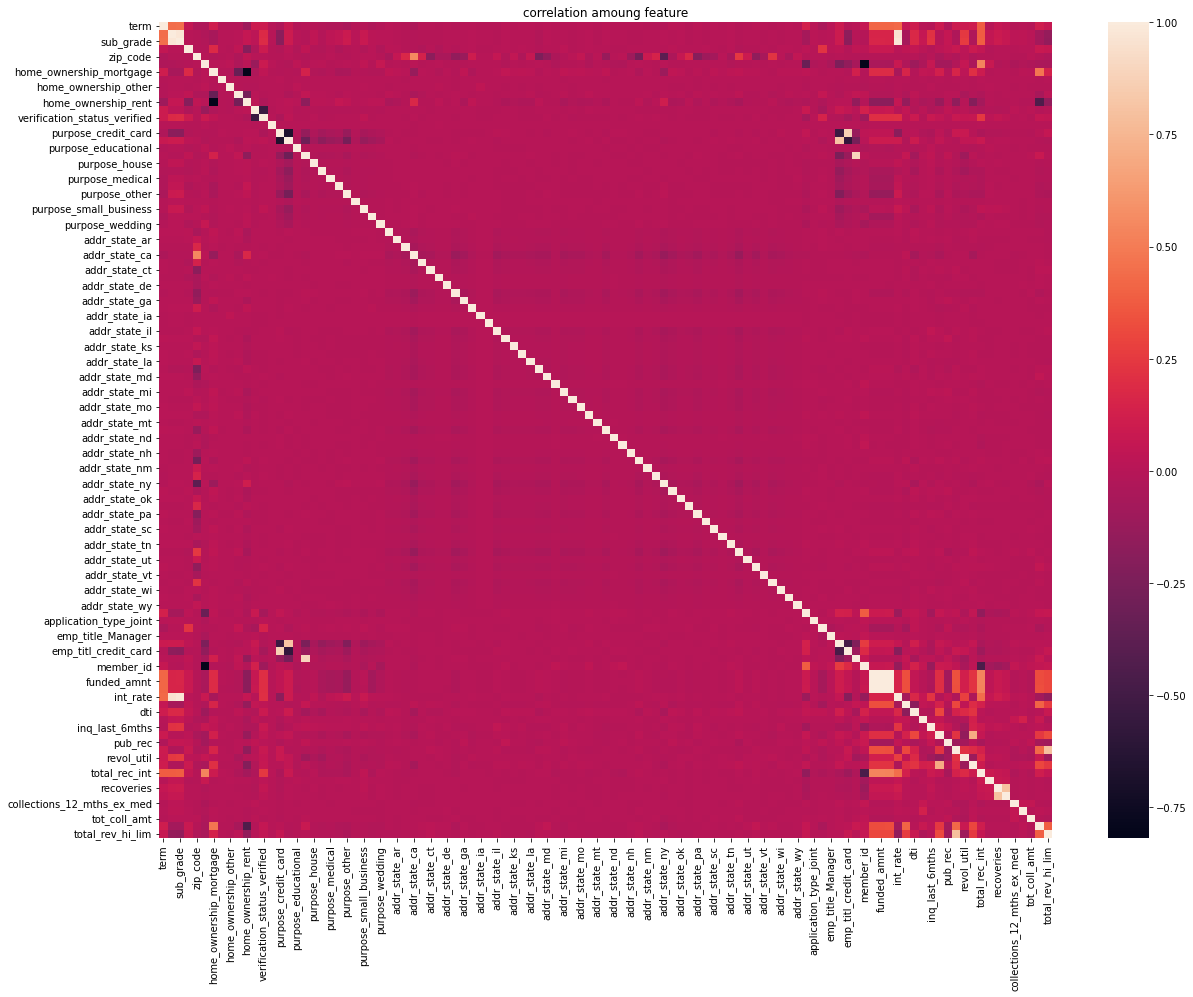

In [84]:
plt.figure(figsize=(20,15))
plt.title("correlation amoung feature")
sns.heatmap(correlation)
plt.show()

In [72]:
!pip install statsmodels

In [85]:
# Let's check multicollinearity
# to calculated VIF we can use the loop
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [90]:

features=list(Final_dataset.columns)
for i in range(1, len(Final_dataset.columns)):
    x=Final_dataset.loc[:,Final_dataset.columns!=features[i]]
    y=Final_dataset.loc[:,Final_dataset.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of grade is 0.953934393588873
VIF for grade is 21.71
R-Sqr value of sub_grade is 0.9836163883337501
VIF for sub_grade is 61.04
R-Sqr value of emp_length is 0.11229718739328243
VIF for emp_length is 1.13
R-Sqr value of zip_code is 0.9973201470293276
VIF for zip_code is 373.15
R-Sqr value of last_week_pay is 0.7437298526157508
VIF for last_week_pay is 3.9
R-Sqr value of home_ownership_mortgage is 0.9990879363526705
VIF for home_ownership_mortgage is 1096.41
R-Sqr value of home_ownership_none is 0.22885956468176116
VIF for home_ownership_none is 1.3
R-Sqr value of home_ownership_other is 0.4911833885602731
VIF for home_ownership_other is 1.97
R-Sqr value of home_ownership_own is 0.9974436112713606
VIF for home_ownership_own is 391.18
R-Sqr value of home_ownership_rent is 0.9990463978623018
VIF for home_ownership_rent is 1048.66
R-Sqr value of verification_status_source verified is 0.3483061173664628
VIF for verification_status_source verified is 1.53
R-Sqr value of verificatio

In [92]:
#DRopping highest VIF score feature
Final_dataset.drop(["zip_code","home_ownership_mortgage","home_ownership_rent","addr_state_fl","addr_state_nj","addr_state_ny","funded_amnt","funded_amnt_inv"],axis=1,inplace=True)

In [95]:
Final_dataset.shape

(532428, 99)

In [96]:
#Create small part of final dataset bcoz iit is taking high time to process vif calculation
Final_dataset1=Final_dataset.iloc[:10000,:]

In [97]:
features=list(Final_dataset1.columns)
for i in range(1, len(Final_dataset1.columns)):
    x=Final_dataset1.loc[:,Final_dataset1.columns!=features[i]]
    y=Final_dataset1.loc[:,Final_dataset1.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of grade is 0.9837931894542303
VIF for grade is 61.7
R-Sqr value of sub_grade is 0.9946979515102962
VIF for sub_grade is 188.61
R-Sqr value of emp_length is 0.7816519760789629
VIF for emp_length is 4.58
R-Sqr value of last_week_pay is 0.8925900401575437
VIF for last_week_pay is 9.31
R-Sqr value of home_ownership_none is 0.006223722654152608
VIF for home_ownership_none is 1.01
R-Sqr value of home_ownership_other is 0.004168497506498503
VIF for home_ownership_other is 1.0
R-Sqr value of home_ownership_own is -3.270226552654872
VIF for home_ownership_own is 0.23
R-Sqr value of verification_status_source verified is -7.888038777926743
VIF for verification_status_source verified is 0.11
R-Sqr value of verification_status_verified is -4.963729768527347
VIF for verification_status_verified is 0.17
R-Sqr value of pymnt_plan_y is nan
VIF for pymnt_plan_y is nan
R-Sqr value of purpose_credit_card is 0.36632643135538023
VIF for purpose_credit_card is 1.58
R-Sqr value of purpose_debt_c

In [98]:
#again drop highest vif score feature
Final_dataset.drop(["sub_grade"],axis=1,inplace=True)

In [99]:
Final_dataset1=Final_dataset.iloc[:10000,:]

In [100]:
features=list(Final_dataset1.columns)
for i in range(1, len(Final_dataset1.columns)):
    x=Final_dataset1.loc[:,Final_dataset1.columns!=features[i]]
    y=Final_dataset1.loc[:,Final_dataset1.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of grade is 0.9694710099411927
VIF for grade is 32.76
R-Sqr value of emp_length is 0.780793142801494
VIF for emp_length is 4.56
R-Sqr value of last_week_pay is 0.8906802152345448
VIF for last_week_pay is 9.15
R-Sqr value of home_ownership_none is 0.006210109343755987
VIF for home_ownership_none is 1.01
R-Sqr value of home_ownership_other is 0.004140498322555031
VIF for home_ownership_other is 1.0
R-Sqr value of home_ownership_own is -3.2746568460751266
VIF for home_ownership_own is 0.23
R-Sqr value of verification_status_source verified is -7.888040260781398
VIF for verification_status_source verified is 0.11
R-Sqr value of verification_status_verified is -4.963756240080506
VIF for verification_status_verified is 0.17
R-Sqr value of pymnt_plan_y is nan
VIF for pymnt_plan_y is nan
R-Sqr value of purpose_credit_card is 0.27155088379198244
VIF for purpose_credit_card is 1.37
R-Sqr value of purpose_debt_consolidation is -0.1705788064818956
VIF for purpose_debt_consolidation is 

In [101]:
Final_dataset.drop(["grade"],axis=1,inplace=True)

In [102]:
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from pdpbox import pdp, get_dataset, info_plots
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc


random_state=42
np.random.seed(random_state)
import warnings
warnings.filterwarnings('ignore')

In [103]:
Final_dataset

,term,emp_length,last_week_pay,home_ownership_none,home_ownership_other,home_ownership_own,verification_status_source verified,verification_status_verified,pymnt_plan_y,purpose_credit_card,...,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,36,9,26,0,0,1,1,0,0,0,...,28.0,1173.84,0.0,0.0,0.0,0.0,0.0,0.0,28699.0,30800.0
1,36,1,9,0,0,0,1,0,0,0,...,13.0,83.95,0.0,0.0,0.0,0.0,0.0,0.0,9974.0,32900.0
2,36,2,9,0,0,1,0,0,0,0,...,19.0,56.47,0.0,0.0,0.0,0.0,0.0,65.0,38295.0,34900.0
3,36,10,135,0,0,0,0,0,0,0,...,21.0,4858.62,0.0,0.0,0.0,0.0,0.0,0.0,55564.0,24700.0
4,36,10,96,0,0,0,0,1,0,1,...,27.0,2296.41,0.0,0.0,0.0,0.0,0.0,0.0,47159.0,47033.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262423,36,10,65,0,0,0,1,0,0,0,...,34.0,2595.45,0.0,0.0,0.0,0.0,0.0,0.0,83087.0,24800.0
262424,60,10,70,0,0,0,0,0,0,0,...,29.0,2182.92,0.0,0.0,0.0,0.0,0.0,0.0,227812.0,17800.0
262425,60,8,9,0,0,0,0,1,0,0,...,26.0,645.32,0.0,0.0,0.0,0.0,0.0,0.0,26010.0,24200.0
262426,60,1,78,0,0,0,1,0,0,1,...,14.0,4619.79,0.0,0.0,0.0,0.0,0.0,0.0,29197.0,23300.0


In [114]:
X=Final_dataset.iloc[:100000,:]
Y=Y_dataset.iloc[:100000,:]

In [117]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
for train_index,test_index in skf.split(X,Y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    Y_train,Y_test=Y.iloc[train_index],Y.iloc[test_index]
print('Shape of X_train :',X_train.shape)
print('Shape of X_test :',X_test.shape)
print('Shape of y_train :',Y_train.shape)
print('Shape of y_test :',Y_test.shape)
    


Shape of X_train : (80000, 97)
Shape of X_test : (20000, 97)
Shape of y_train : (80000, 1)
Shape of y_test : (20000, 1)


In [118]:
#logistic regression
lm_model=LogisticRegression(random_state=42)
lm_model.fit(X_train,Y_train)


LogisticRegression(random_state=42)

In [120]:
#Accuracy of model-
lm_score=lm_model.score(X_train,Y_train)
print("logistic_model score:",lm_score)

logistic_model score: 0.810275


In [122]:
#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(lm_model,X_test,Y_test,cv=10)
##Cross validation score-
cv_score=cross_val_score(lm_model,X_train,Y_train,cv=10)

In [125]:
cv_score.mean()

0.815675

# Accuracy of the model is not th best metric to use while evaluating the imbalanced datasets as it may be misleading. We are going to change the performance metric.


#Confusion Matrix:-


In [131]:
cm=confusion_matrix(Y_test,cv_predict)


cm 

array([[14666,   608],
       [ 3048,  1678]], dtype=int64)

In [133]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(Y_test,cv_predict)
print("ROC AUC score:",roc_score)

ROC AUC score: 0.6576254620701685


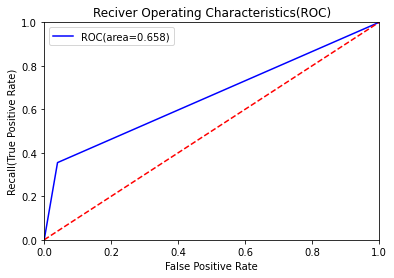

AUC: 0.6576254620701685


In [134]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(Y_test,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)


Observation:- On comparing roc_auc_score and model accuracy, model is not performing well on imbalanced data.

In [136]:
#Classification report:-
classification_score=classification_report(Y_test,cv_predict)
print(classification_score)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     15274
           1       0.73      0.36      0.48      4726

    accuracy                           0.82     20000
   macro avg       0.78      0.66      0.68     20000
weighted avg       0.81      0.82      0.79     20000



# Oversample Minority Class:-

-Adding more copies of minority class.
-It can be a good option we dont have that much large data to work.
-Drawback of this process is we are adding info. That can lead to overfitting or poor performance on test data.
Undersample Mojorityclass:-

-Removing some copies of majority class.
-It can be a good option if we have very large amount of data say in millions to work.
-Drawback of this process is we are removing some valuable info. that can leads to underfitting & poor performance on        test data.
As per the drawbacks of both the model we will use SMOTE ( Synthetic Minority Oversampling technique) that is more best than the above as compare to above one's.

SMOTE ( Synthetic Minority Oversampling technique):- This is a statistical technique for increasing the number of cases in your dataset in a balanced way. It uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.

In [138]:
!pip install imbalanced-learn


In [140]:
!pip install delayed

In [141]:
import imblearn
from imblearn.over_sampling import SMOTE


In [143]:
sm=SMOTE(sampling_strategy=0.4,random_state=42)
#Generating synthetic data points
X_smote,Y_smote=sm.fit_resample(X_train,Y_train)
X_smote_test,Y_smote_test=sm.fit_resample(X_test,Y_test)

# Building Logistsic regression model on synthetic data points:-

In [144]:
#Logistic regression model for SMOTE:-
smote=LogisticRegression(random_state=42)
#fitting the smote model:-
smote.fit(X_smote,Y_smote)

LogisticRegression(random_state=42)

In [146]:
#Accuracy of the model:-
smote_accuracy=smote.score(X_smote,Y_smote)
smote_accuracy

0.8098784194528875

In [147]:
#Cross validation prediction for SMOTE:-
cv_predict_smote=cross_val_predict(smote,X_smote_test,Y_smote_test,cv=10)
#Cross validation score:-
cv_score_smote=cross_val_score(smote,X_smote,Y_smote,cv=10)
cv_score_smote.mean()

0.7969254150105215

In [148]:
#Confusion matrix:-
cm_smote=confusion_matrix(Y_smote_test,cv_predict_smote)

In [149]:
cm_smote

array([[14291,   983],
       [ 3315,  2794]], dtype=int64)

In [150]:
#ROC_AUC SCORE:-
roc_aoc_score_smote=roc_auc_score(Y_smote_test,cv_predict_smote)
print("ROC_AOC_SCORE:",roc_aoc_score_smote)

ROC_AOC_SCORE: 0.696500132152501
